In [20]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import time
import matplotlib.pyplot as plt

## DATA PREPROCESSING

In [4]:
df_train = pd.read_csv('D_train.csv')

In [5]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)

##### group by user

In [6]:
# split the dataset by user

df_user0 = df_train[df_train['User'] == 0].drop('User', axis=1).reset_index().drop('index', axis=1)
df_user1 = df_train[df_train['User'] == 1].drop('User', axis=1).reset_index().drop('index', axis=1)
df_user2 = df_train[df_train['User'] == 2].drop('User', axis=1).reset_index().drop('index', axis=1)
df_user5 = df_train[df_train['User'] == 5].drop('User', axis=1).reset_index().drop('index', axis=1)
df_user6 = df_train[df_train['User'] == 6].drop('User', axis=1).reset_index().drop('index', axis=1)
df_user8 = df_train[df_train['User'] == 8].drop('User', axis=1).reset_index().drop('index', axis=1)
df_user9 = df_train[df_train['User'] == 9].drop('User', axis=1).reset_index().drop('index', axis=1)
df_user10 = df_train[df_train['User'] == 10].drop('User', axis=1).reset_index().drop('index', axis=1)
df_user11 = df_train[df_train['User'] == 11].drop('User', axis=1).reset_index().drop('index', axis=1)

In [7]:
df_user0

,Class,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,1,74.783715,43.948122,-75.612291,54.233130,79.728232,-59.674210,35.026452,88.677279,-48.219135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,5.049161,64.413681,-63.369229,22.518635,137.176253,-78.387148,26.928555,94.926616,-41.863022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,60.172219,82.358864,-96.097451,56.613521,57.348307,-90.716512,13.032163,132.025198,-39.751752,...,-1.870277,79.044872,90.993863,-27.306292,NaN,NaN,NaN,NaN,NaN,NaN
3,3,72.447893,49.526689,-71.785358,77.643397,75.411380,-71.277906,58.942761,15.504489,-70.529853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,15.820552,68.284762,-60.498150,-4.137009,56.901815,-62.685932,32.524498,94.686462,-36.976763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,3,62.313851,24.973890,-64.172987,71.009352,57.118060,-69.854117,80.497261,83.255774,-63.071412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,2,-9.910811,94.892202,7.893879,34.959570,168.337964,-9.770941,32.934525,110.634652,-12.745550,...,17.869453,54.532823,104.894590,-25.495007,84.224119,62.973223,-87.903335,NaN,NaN,NaN
1497,1,59.235676,3.311413,-71.714641,80.319771,60.796399,-82.842656,72.112544,36.128093,-78.873255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,4,28.289141,90.534077,-44.243447,49.810079,91.507368,-46.406029,5.809949,61.813475,-64.618422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Create permutation invariant features

In [8]:
df_user = []
df_user.append(df_user0)
df_user.append(df_user1)
df_user.append(df_user2)
df_user.append(df_user5)
df_user.append(df_user6)
df_user.append(df_user8)
df_user.append(df_user9)
df_user.append(df_user10)
df_user.append(df_user11)

# design feature HERE

df_user_num = []
df_user_X = []
df_user_Y = []
df_user_Z = []
df_user_square_root = []
df_user_mul = []
df_user_cross_mul = []

for each_df in df_user:
    
    # Given by tutorial
    
    each_df_num = each_df[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]
    each_df_num['Num'] = each_df_num.count(axis=1) 
    each_df_num.drop(['X0','X1','X2','X3','X4','X5','X6','X7','X8', 'X9','X10','X11'], axis=1, inplace=True)
    df_user_num.append(each_df_num.copy())
    
    each_df_X = each_df[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]
    each_df_X['XMean'] = each_df_X[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']].mean(axis=1, skipna=True)
    each_df_X['XStd'] = each_df_X[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']].std(axis=1, skipna=True)
    each_df_X['XMax'] = each_df_X[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']].max(axis=1, skipna=True)
    each_df_X['XMin'] = each_df_X[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']].min(axis=1, skipna=True)
    each_df_X.drop(['X0','X1','X2','X3','X4','X5','X6','X7','X8', 'X9','X10','X11'], axis=1, inplace=True)
    df_user_X.append(each_df_X.copy())
    
    each_df_Y = each_df[['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11']]
    each_df_Y['YMean'] = each_df_Y[['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11']].mean(axis=1, skipna=True)
    each_df_Y['YStd'] = each_df_Y[['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11']].std(axis=1, skipna=True)
    each_df_Y['YMax'] = each_df_Y[['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11']].max(axis=1, skipna=True)
    each_df_Y['YMin'] = each_df_Y[['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11']].min(axis=1, skipna=True)
    each_df_Y.drop(['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11'], axis=1, inplace=True)
    df_user_Y.append(each_df_Y.copy())
    
    each_df_Z = each_df[['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11']]
    each_df_Z['ZMean'] = each_df_Z[['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11']].mean(axis=1, skipna=True)
    each_df_Z['ZStd'] = each_df_Z[['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11']].std(axis=1, skipna=True)
    each_df_Z['ZMax'] = each_df_Z[['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11']].max(axis=1, skipna=True)
    each_df_Z['ZMin'] = each_df_Z[['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11']].min(axis=1, skipna=True)
    each_df_Z.drop(['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11'], axis=1, inplace=True)
    df_user_Z.append(each_df_Z.copy())
    
    # (1/n) * sqrt(x2 + y2 + z2)
    
    each_df_SR_0_s = (each_df['X0'].apply(np.square) + each_df['Y0'].apply(np.square) + each_df['Z0'].apply(np.square)).apply(np.sqrt)
    each_df_SR_1_s = (each_df['X1'].apply(np.square) + each_df['Y1'].apply(np.square) + each_df['Z1'].apply(np.square)).apply(np.sqrt)
    each_df_SR_2_s = (each_df['X2'].apply(np.square) + each_df['Y2'].apply(np.square) + each_df['Z2'].apply(np.square)).apply(np.sqrt)
    each_df_SR_3_s = (each_df['X3'].apply(np.square) + each_df['Y3'].apply(np.square) + each_df['Z3'].apply(np.square)).apply(np.sqrt)
    each_df_SR_4_s = (each_df['X4'].apply(np.square) + each_df['Y4'].apply(np.square) + each_df['Z4'].apply(np.square)).apply(np.sqrt)
    each_df_SR_5_s = (each_df['X5'].apply(np.square) + each_df['Y5'].apply(np.square) + each_df['Z5'].apply(np.square)).apply(np.sqrt)
    each_df_SR_6_s = (each_df['X6'].apply(np.square) + each_df['Y6'].apply(np.square) + each_df['Z6'].apply(np.square)).apply(np.sqrt)
    each_df_SR_7_s = (each_df['X7'].apply(np.square) + each_df['Y7'].apply(np.square) + each_df['Z7'].apply(np.square)).apply(np.sqrt)
    each_df_SR_8_s = (each_df['X8'].apply(np.square) + each_df['Y8'].apply(np.square) + each_df['Z8'].apply(np.square)).apply(np.sqrt)
    each_df_SR_9_s = (each_df['X9'].apply(np.square) + each_df['Y9'].apply(np.square) + each_df['Z9'].apply(np.square)).apply(np.sqrt)
    each_df_SR_10_s = (each_df['X10'].apply(np.square) + each_df['Y10'].apply(np.square) + each_df['Z10'].apply(np.square)).apply(np.sqrt)
    each_df_SR_11_s = (each_df['X11'].apply(np.square) + each_df['Y11'].apply(np.square) + each_df['Z11'].apply(np.square)).apply(np.sqrt)
    each_df_SR_frame = pd.DataFrame({0:each_df_SR_0_s, 1:each_df_SR_1_s, 2:each_df_SR_2_s, 3:each_df_SR_3_s, 4:each_df_SR_4_s,
                                    5:each_df_SR_5_s, 6:each_df_SR_6_s, 7:each_df_SR_7_s, 8:each_df_SR_8_s, 9:each_df_SR_9_s,
                                    10:each_df_SR_10_s, 11:each_df_SR_11_s})
    each_df_SR_frame['SR'] = each_df_SR_frame.mean(axis=1, skipna=True)
    each_df_SR_frame.drop([0,1,2,3,4,5,6,7,8,9,10,11], axis=1, inplace=True)
    df_user_square_root.append(each_df_SR_frame)
    
    # (1/n) cub(xyz)  mul
    
    f = lambda x: np.sign(x) * np.power(abs(x), 1./3)
    
    each_df_mul_0_s = (each_df['X0'] * each_df['Y0'] * each_df['Z0']).apply(f)
    each_df_mul_1_s = (each_df['X1'] * each_df['Y1'] * each_df['Z1']).apply(f)
    each_df_mul_2_s = (each_df['X2'] * each_df['Y2'] * each_df['Z2']).apply(f)
    each_df_mul_3_s = (each_df['X3'] * each_df['Y3'] * each_df['Z3']).apply(f)
    each_df_mul_4_s = (each_df['X4'] * each_df['Y4'] * each_df['Z4']).apply(f)
    each_df_mul_5_s = (each_df['X5'] * each_df['Y5'] * each_df['Z5']).apply(f)
    each_df_mul_6_s = (each_df['X6'] * each_df['Y6'] * each_df['Z6']).apply(f)
    each_df_mul_7_s = (each_df['X7'] * each_df['Y7'] * each_df['Z7']).apply(f)
    each_df_mul_8_s = (each_df['X8'] * each_df['Y8'] * each_df['Z8']).apply(f)
    each_df_mul_9_s = (each_df['X9'] * each_df['Y9'] * each_df['Z9']).apply(f)
    each_df_mul_10_s = (each_df['X10'] * each_df['Y10'] * each_df['Z10']).apply(f)
    each_df_mul_11_s = (each_df['X11'] * each_df['Y11'] * each_df['Z11']).apply(f)
    each_df_mul_frame = pd.DataFrame({0:each_df_mul_0_s, 1:each_df_mul_1_s, 2:each_df_mul_2_s, 3:each_df_mul_3_s, 4:each_df_mul_4_s,
                                    5:each_df_mul_5_s, 6:each_df_mul_6_s, 7:each_df_mul_7_s, 8:each_df_mul_8_s, 9:each_df_mul_9_s,
                                    10:each_df_mul_10_s, 11:each_df_mul_11_s})
    each_df_mul_frame['Mul'] = each_df_mul_frame.mean(axis=1, skipna=True)
    each_df_mul_frame.drop([0,1,2,3,4,5,6,7,8,9,10,11], axis=1, inplace=True)
    df_user_mul.append(each_df_mul_frame)
    
    # (1/n) sqrt(|xy + yz + xz|)  cross mul
    
    each_df_CM_0_s = (each_df['X0'] * each_df['Y0'] + each_df['Y0'] * each_df['Z0'] + each_df['X0'] * each_df['Z0']).apply(np.abs).apply(np.sqrt)
    each_df_CM_1_s = (each_df['X1'] * each_df['Y1'] + each_df['Y1'] * each_df['Z1'] + each_df['X1'] * each_df['Z1']).apply(np.abs).apply(np.sqrt)
    each_df_CM_2_s = (each_df['X2'] * each_df['Y2'] + each_df['Y2'] * each_df['Z2'] + each_df['X2'] * each_df['Z2']).apply(np.abs).apply(np.sqrt)
    each_df_CM_3_s = (each_df['X3'] * each_df['Y3'] + each_df['Y3'] * each_df['Z3'] + each_df['X3'] * each_df['Z3']).apply(np.abs).apply(np.sqrt)
    each_df_CM_4_s = (each_df['X4'] * each_df['Y4'] + each_df['Y4'] * each_df['Z4'] + each_df['X4'] * each_df['Z4']).apply(np.abs).apply(np.sqrt)
    each_df_CM_5_s = (each_df['X5'] * each_df['Y5'] + each_df['Y5'] * each_df['Z5'] + each_df['X5'] * each_df['Z5']).apply(np.abs).apply(np.sqrt)
    each_df_CM_6_s = (each_df['X6'] * each_df['Y6'] + each_df['Y6'] * each_df['Z6'] + each_df['X6'] * each_df['Z6']).apply(np.abs).apply(np.sqrt)
    each_df_CM_7_s = (each_df['X7'] * each_df['Y7'] + each_df['Y7'] * each_df['Z7'] + each_df['X7'] * each_df['Z7']).apply(np.abs).apply(np.sqrt)
    each_df_CM_8_s = (each_df['X8'] * each_df['Y8'] + each_df['Y8'] * each_df['Z8'] + each_df['X8'] * each_df['Z8']).apply(np.abs).apply(np.sqrt)
    each_df_CM_9_s = (each_df['X9'] * each_df['Y9'] + each_df['Y9'] * each_df['Z9'] + each_df['X9'] * each_df['Z9']).apply(np.abs).apply(np.sqrt)
    each_df_CM_10_s = (each_df['X10'] * each_df['Y10'] + each_df['Y10'] * each_df['Z10'] + each_df['X10'] * each_df['Z10']).apply(np.abs).apply(np.sqrt)
    each_df_CM_11_s = (each_df['X11'] * each_df['Y11'] + each_df['Y11'] * each_df['Z11'] + each_df['X11'] * each_df['Z11']).apply(np.abs).apply(np.sqrt)
    each_df_CM_frame = pd.DataFrame({0:each_df_CM_0_s, 1:each_df_CM_1_s, 2:each_df_CM_2_s, 3:each_df_CM_3_s, 4:each_df_CM_4_s,
                                    5:each_df_CM_5_s, 6:each_df_CM_6_s, 7:each_df_CM_7_s, 8:each_df_CM_8_s, 9:each_df_CM_9_s,
                                    10:each_df_CM_10_s, 11:each_df_CM_11_s})
    each_df_CM_frame['CM'] = each_df_CM_frame.mean(axis=1, skipna=True)
    each_df_CM_frame.drop([0,1,2,3,4,5,6,7,8,9,10,11], axis=1, inplace=True)
    df_user_cross_mul.append(each_df_CM_frame)

D:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

##### Balance the dataset or not

In [9]:
# whether the dataset is balanced
num_each_class = np.zeros(5)
for each in df_user:
    for each_class in each['Class']:
        num_each_class[each_class - 1] += 1
print(num_each_class, np.sum(num_each_class))

[2784. 2582. 2649. 2476. 3009.] 13500.0


In [10]:
df_user_total = []

for i in range(len(df_user_num)):
    tmp = pd.concat([df_user[i]['Class'], df_user_num[i], df_user_X[i], df_user_Y[i], df_user_Z[i], df_user_square_root[i], df_user_mul[i], df_user_cross_mul[i]],axis=1)
    df_user_total.append(tmp.copy())

df_user_total[i]

,Class,Num,XMean,XStd,XMax,XMin,YMean,YStd,YMax,YMin,ZMean,ZStd,ZMax,ZMin,SR,Mul,CM
0,3,6,65.310295,37.006879,114.084271,9.095575,67.869235,43.220052,132.113765,15.859368,-29.286431,30.950005,13.472996,-53.757380,113.423960,-19.563553,66.012354
1,2,11,52.287442,35.577836,106.150565,-6.794920,94.249661,45.500539,147.428253,10.488125,-14.204201,21.393152,7.381615,-49.027299,121.228443,-19.677537,58.545005
2,4,8,60.402556,41.530998,127.432164,12.681688,65.547215,55.211561,136.864251,-7.149556,-44.151817,12.945062,-30.831793,-68.763287,117.252094,-38.108426,50.381155
3,4,7,60.576136,35.029468,113.070872,16.822433,79.251016,53.016884,148.619537,12.028639,-22.964370,34.872712,13.754207,-62.732329,120.747534,-15.823753,68.083334
4,2,11,53.362749,33.943808,101.579356,-5.522550,93.830670,45.253028,146.196449,10.269291,-14.284496,22.286095,7.163382,-50.075334,121.070245,-17.129889,61.036262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,4,7,61.258221,34.874533,114.027471,18.407727,79.174270,52.967400,147.856059,12.115830,-22.345855,34.963130,13.009737,-61.560916,120.892995,-12.606278,68.990600
1496,5,10,30.835191,45.086724,93.599911,-30.651360,96.193603,43.534621,152.306531,11.489999,-27.425594,24.009568,5.030590,-65.028531,120.467325,-5.403477,63.685807
1497,4,7,60.308991,35.613476,114.104454,16.269525,79.727393,52.646034,148.405999,13.152743,-22.031523,35.059781,13.033956,-60.452967,120.823065,-7.830604,68.175589
1498,1,6,48.869858,28.879387,74.950069,5.283299,75.131177,32.216882,100.745119,20.601580,-42.397538,16.147467,-22.245392,-57.747381,107.243138,-48.481057,42.799240


In [11]:
data_augmentor=RandomOverSampler(random_state=0)
# data_augmentor=RandomUnderSampler(ratio=0.4,random_state=0,replacement=True)

df_user_total_balanced = []
for each in df_user_total:
    x_resample, y_resample=data_augmentor.fit_sample(each.drop('Class', axis=1), each['Class'])
    x_resample['Class'] = y_resample
    cols = list(x_resample)
    cols.insert(0,cols.pop(cols.index('Class')))    
    x_resample = x_resample.loc[:,cols]
    df_user_total_balanced.append(x_resample)

In [12]:
df_user_total_balanced[0]

,Class,Num,XMean,XStd,XMax,XMin,YMean,YStd,YMax,YMin,ZMean,ZStd,ZMax,ZMin,SR,Mul,CM
0,1,5,62.611918,20.870001,89.998023,35.026452,58.867650,30.268667,88.677279,13.795406,-65.437021,11.359656,-48.219135,-75.612291,112.595178,-58.937202,65.724563
1,4,7,17.287287,24.100677,48.780467,-14.664051,88.110860,38.970251,137.176253,34.896237,-63.653024,18.612961,-41.863022,-95.513683,116.015794,-28.374637,62.418624
2,5,10,39.364737,34.506650,79.044872,-14.200669,95.257718,33.419335,132.025198,27.214493,-40.977236,37.772144,7.820264,-96.097451,123.714329,-32.053063,62.808655
3,3,5,62.825050,12.053743,77.643397,47.931381,73.585900,45.054423,135.408132,15.504489,-58.153958,18.169332,-33.916311,-71.785358,119.953611,-60.047690,52.199013
4,4,6,28.453045,20.400478,52.950146,-4.137009,99.091355,34.344089,140.253960,56.901815,-52.165259,15.056128,-32.015568,-69.913921,118.600939,-42.119094,54.322336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,4,7,17.400683,23.757514,48.670319,-14.412264,88.485023,39.145215,137.659266,34.227635,-63.046712,18.720562,-43.115140,-96.317989,115.978747,-28.407037,62.063452
1691,4,6,27.955109,20.338252,52.667490,-4.209304,100.067572,33.314282,140.211818,59.231526,-50.698930,14.404840,-31.861614,-69.669424,118.313822,-41.634345,53.849696
1692,4,7,23.928098,24.516627,54.414521,-9.796040,90.169292,38.654065,141.108750,38.036838,-58.683035,20.285934,-35.599176,-95.033132,116.459799,-32.562100,53.691819
1693,4,7,21.321688,26.059612,53.119297,-13.112137,85.721401,38.298127,134.739543,33.840956,-65.164738,18.755248,-43.406122,-97.670210,115.923351,-31.337373,61.798147


In [13]:
# whether the dataset is balanced after data balance
num_each_class = np.zeros(5)
for each in df_user_total_balanced: # balanced
# for each in df_user_total: # unbalanced
    for each_class in each['Class']:
        num_each_class[each_class - 1] += 1
print(num_each_class, np.sum(num_each_class))

[3341. 3341. 3341. 3341. 3341.] 16705.0


In [14]:
normization = StandardScaler()
# normization = MinMaxScaler()

train_score_NB = []
val_score_NB = []


# Naive Bayes
for i in range(len(df_user_total_balanced)):
    # balanced
    df_user_train = df_user_total_balanced[:i] + df_user_total_balanced[i+1:]
    df_user_val = df_user_total_balanced[i]
    # unbalanced
#     df_user_train = df_user_total[:i] + df_user_total[i+1:]
#     df_user_val = df_user_total[i]
    train_df =[]
    val_df = df_user_val.copy()
    for each_subset in df_user_train:
        if isinstance(train_df, list):
            train_df = each_subset
        else:
            train_df = pd.concat((train_df, each_subset), axis=0, ignore_index=True)
            
    # Finished train test split
    normization.fit(train_df.drop('Class', axis=1))
    train_data = normization.transform(train_df.drop('Class', axis=1))
    train_label = np.array(train_df['Class'])
    
    val_data = normization.transform(val_df.drop('Class', axis=1))
    val_label = np.array(val_df['Class'])
    # Phi machine
    poly = PolynomialFeatures(2)
    train_data_poly = poly.fit_transform(train_data)
    
    # classify
    gnb = GaussianNB()
    
    # Phi machine
#     gnb.fit(train_data_poly, train_label) # Phi machine
#     train_score_NB.append(gnb.score(train_data_poly, train_label))
#     val_score_NB.append(gnb.score(val_data_poly, val_label))
    
    gnb.fit(train_data, train_label) # Linear machine
    train_score_NB.append(gnb.score(train_data, train_label))
    val_score_NB.append(gnb.score(val_data, val_label))

print('train score average is', np.mean(train_score_NB))
print('validation score average is', np.mean(val_score_NB))
print('train score standard var is', np.std(train_score_NB))
print('validation score standard var is', np.std(val_score_NB))

train score average is 0.9006897903642975
validation score average is 0.7975828513432355
train score standard var is 0.009886878525168534
validation score standard var is 0.12755871980072084


In [19]:
# SVM 

size_C = 5
size_gamma = 5
C = np.logspace(-3, 3, num=size_C)
gamma = np.logspace(-3, 3, num=size_gamma)
ACC_SVM = np.zeros((size_gamma, size_C))
DEV_SVM = np.zeros((size_gamma, size_C))

train_score_SVM = []
val_score_SVM = []

start = time.time()

for i in range(size_gamma):
    for j in range(size_C):
        
        svmclf = svm.SVC(C=C[j], kernel='rbf', gamma=gamma[i])
        acc = []
        print('i =', i, 'j =', j)
        for k in range(len(df_user_total_balanced)):
            # balanced
            df_user_train = df_user_total_balanced[:k] + df_user_total_balanced[k+1:]
            df_user_val = df_user_total_balanced[k]
            # unbalanced
            # df_user_train = df_user_total[:k] + df_user_total[k+1:]
            # df_user_val = df_user_total[k]
            train_df =[]
            val_df = df_user_val.copy()
            for each_subset in df_user_train:
                if isinstance(train_df, list):
                    train_df = each_subset
                else:
                    train_df = pd.concat((train_df, each_subset), axis=0, ignore_index=True)

            # Finished train test split
            normization.fit(train_df.drop('Class', axis=1))
            train_data = normization.transform(train_df.drop('Class', axis=1))
            train_label = np.array(train_df['Class'])

            val_data = normization.transform(val_df.drop('Class', axis=1))
            val_label = np.array(val_df['Class'])
            # Phi machine
            # poly = PolynomialFeatures(2)
            # train_data_poly = poly.fit_transform(train_data)
            
            # Phi machine
            # gnb.fit(train_data_poly, train_label) # Phi machine
            # train_score.append(gnb.score(train_data_poly, train_label))
            # val_score.append(gnb.score(val_data_poly, val_label))

            # classify
            
            svmclf.fit(train_data, train_label) # Linear machine
            acc.append(svmclf.score(val_data, val_label))
            
        ACC_SVM[i, j] = np.mean(acc)
        DEV_SVM[i, j] = np.std(acc)

print(time.time() - start)
plt.imshow(ACC_SVM)
plt.colorbar()

i = 0 j = 0
i = 0 j = 1
i = 0 j = 2
i = 0 j = 3
i = 0 j = 4
i = 1 j = 0
i = 1 j = 1
i = 1 j = 2
i = 1 j = 3
i = 1 j = 4
i = 2 j = 0
i = 2 j = 1
i = 2 j = 2
i = 2 j = 3
i = 2 j = 4
i = 3 j = 0
i = 3 j = 1
i = 3 j = 2
i = 3 j = 3
i = 3 j = 4
i = 4 j = 0
i = 4 j = 1
i = 4 j = 2
i = 4 j = 3
i = 4 j = 4
2991.770852804184


NameError: name 'plt' is not defined

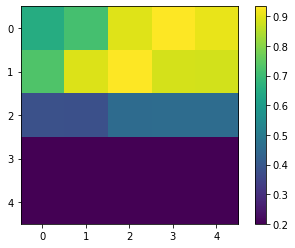

In [21]:
plt.imshow(ACC_SVM)
plt.colorbar()

In [18]:
df_test = pd.read_csv('D_test.csv')
df_test.drop('Unnamed: 0', axis=1, inplace=True)

df_user12 = df_test[df_test['User'] == 12].drop('User', axis=1).reset_index().drop('index', axis=1)
df_user13 = df_test[df_test['User'] == 13].drop('User', axis=1).reset_index().drop('index', axis=1)
df_user14 = df_test[df_test['User'] == 14].drop('User', axis=1).reset_index().drop('index', axis=1)

In [19]:
df_user_test = []
df_user_test.append(df_user12)
df_user_test.append(df_user13)
df_user_test.append(df_user14)

df_user_num_test = []
df_user_X_test = []
df_user_Y_test = []
df_user_Z_test = []
df_user_square_root_test = []
df_user_mul_test = []
df_user_cross_mul_test = []

def power_3(x):
    return np.power(x, 1/3)

for each_df in df_user_test:
    
    # Given by tutorial
    each_df_num = each_df[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]
    each_df_num['Num'] = each_df_num.count(axis=1) 
    each_df_num.drop(['X0','X1','X2','X3','X4','X5','X6','X7','X8', 'X9','X10','X11'], axis=1, inplace=True)
    df_user_num_test.append(each_df_num.copy())
    
    each_df_X = each_df[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']]
    each_df_X['XMean'] = each_df_X[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']].mean(axis=1, skipna=True)
    each_df_X['XStd'] = each_df_X[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']].std(axis=1, skipna=True)
    each_df_X['XMax'] = each_df_X[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']].max(axis=1, skipna=True)
    each_df_X['XMin'] = each_df_X[['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']].min(axis=1, skipna=True)
    each_df_X.drop(['X0','X1','X2','X3','X4','X5','X6','X7','X8', 'X9','X10','X11'], axis=1, inplace=True)
    df_user_X_test.append(each_df_X.copy())
    
    each_df_Y = each_df[['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11']]
    each_df_Y['YMean'] = each_df_Y[['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11']].mean(axis=1, skipna=True)
    each_df_Y['YStd'] = each_df_Y[['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11']].std(axis=1, skipna=True)
    each_df_Y['YMax'] = each_df_Y[['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11']].max(axis=1, skipna=True)
    each_df_Y['YMin'] = each_df_Y[['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11']].min(axis=1, skipna=True)
    each_df_Y.drop(['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11'], axis=1, inplace=True)
    df_user_Y_test.append(each_df_Y.copy())
    
    each_df_Z = each_df[['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11']]
    each_df_Z['ZMean'] = each_df_Z[['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11']].mean(axis=1, skipna=True)
    each_df_Z['ZStd'] = each_df_Z[['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11']].std(axis=1, skipna=True)
    each_df_Z['ZMax'] = each_df_Z[['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11']].max(axis=1, skipna=True)
    each_df_Z['ZMin'] = each_df_Z[['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11']].min(axis=1, skipna=True)
    each_df_Z.drop(['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8', 'Z9','Z10','Z11'], axis=1, inplace=True)
    df_user_Z_test.append(each_df_Z.copy())
    
    # (1/n) * sqrt(x2 + y2 + z2)
    
    each_df_SR_0_s = (each_df['X0'].apply(np.square) + each_df['Y0'].apply(np.square) + each_df['Z0'].apply(np.square)).apply(np.sqrt)
    each_df_SR_1_s = (each_df['X1'].apply(np.square) + each_df['Y1'].apply(np.square) + each_df['Z1'].apply(np.square)).apply(np.sqrt)
    each_df_SR_2_s = (each_df['X2'].apply(np.square) + each_df['Y2'].apply(np.square) + each_df['Z2'].apply(np.square)).apply(np.sqrt)
    each_df_SR_3_s = (each_df['X3'].apply(np.square) + each_df['Y3'].apply(np.square) + each_df['Z3'].apply(np.square)).apply(np.sqrt)
    each_df_SR_4_s = (each_df['X4'].apply(np.square) + each_df['Y4'].apply(np.square) + each_df['Z4'].apply(np.square)).apply(np.sqrt)
    each_df_SR_5_s = (each_df['X5'].apply(np.square) + each_df['Y5'].apply(np.square) + each_df['Z5'].apply(np.square)).apply(np.sqrt)
    each_df_SR_6_s = (each_df['X6'].apply(np.square) + each_df['Y6'].apply(np.square) + each_df['Z6'].apply(np.square)).apply(np.sqrt)
    each_df_SR_7_s = (each_df['X7'].apply(np.square) + each_df['Y7'].apply(np.square) + each_df['Z7'].apply(np.square)).apply(np.sqrt)
    each_df_SR_8_s = (each_df['X8'].apply(np.square) + each_df['Y8'].apply(np.square) + each_df['Z8'].apply(np.square)).apply(np.sqrt)
    each_df_SR_9_s = (each_df['X9'].apply(np.square) + each_df['Y9'].apply(np.square) + each_df['Z9'].apply(np.square)).apply(np.sqrt)
    each_df_SR_10_s = (each_df['X10'].apply(np.square) + each_df['Y10'].apply(np.square) + each_df['Z10'].apply(np.square)).apply(np.sqrt)
    each_df_SR_11_s = (each_df['X11'].apply(np.square) + each_df['Y11'].apply(np.square) + each_df['Z11'].apply(np.square)).apply(np.sqrt)
    each_df_SR_frame = pd.DataFrame({0:each_df_SR_0_s, 1:each_df_SR_1_s, 2:each_df_SR_2_s, 3:each_df_SR_3_s, 4:each_df_SR_4_s,
                                    5:each_df_SR_5_s, 6:each_df_SR_6_s, 7:each_df_SR_7_s, 8:each_df_SR_8_s, 9:each_df_SR_9_s,
                                    10:each_df_SR_10_s, 11:each_df_SR_11_s})
    each_df_SR_frame['SR'] = each_df_SR_frame.mean(axis=1, skipna=True)
    each_df_SR_frame.drop([0,1,2,3,4,5,6,7,8,9,10,11], axis=1, inplace=True)
    df_user_square_root_test.append(each_df_SR_frame)
    
    # (1/n) cub(xyz)  mul

    f = lambda x: np.sign(x) * np.power(abs(x), 1./3)
    
    each_df_mul_0_s = (each_df['X0'] * each_df['Y0'] * each_df['Z0']).apply(f)
    each_df_mul_1_s = (each_df['X1'] * each_df['Y1'] * each_df['Z1']).apply(f)
    each_df_mul_2_s = (each_df['X2'] * each_df['Y2'] * each_df['Z2']).apply(f)
    each_df_mul_3_s = (each_df['X3'] * each_df['Y3'] * each_df['Z3']).apply(f)
    each_df_mul_4_s = (each_df['X4'] * each_df['Y4'] * each_df['Z4']).apply(f)
    each_df_mul_5_s = (each_df['X5'] * each_df['Y5'] * each_df['Z5']).apply(f)
    each_df_mul_6_s = (each_df['X6'] * each_df['Y6'] * each_df['Z6']).apply(f)
    each_df_mul_7_s = (each_df['X7'] * each_df['Y7'] * each_df['Z7']).apply(f)
    each_df_mul_8_s = (each_df['X8'] * each_df['Y8'] * each_df['Z8']).apply(f)
    each_df_mul_9_s = (each_df['X9'] * each_df['Y9'] * each_df['Z9']).apply(f)
    each_df_mul_10_s = (each_df['X10'] * each_df['Y10'] * each_df['Z10']).apply(f)
    each_df_mul_11_s = (each_df['X11'] * each_df['Y11'] * each_df['Z11']).apply(f)
    each_df_mul_frame = pd.DataFrame({0:each_df_mul_0_s, 1:each_df_mul_1_s, 2:each_df_mul_2_s, 3:each_df_mul_3_s, 4:each_df_mul_4_s,
                                    5:each_df_mul_5_s, 6:each_df_mul_6_s, 7:each_df_mul_7_s, 8:each_df_mul_8_s, 9:each_df_mul_9_s,
                                    10:each_df_mul_10_s, 11:each_df_mul_11_s})
    each_df_mul_frame['Mul'] = each_df_mul_frame.mean(axis=1, skipna=True)
    each_df_mul_frame.drop([0,1,2,3,4,5,6,7,8,9,10,11], axis=1, inplace=True)
    df_user_mul_test.append(each_df_mul_frame)
    
    # (1/n) sqrt(|xy + yz + xz|)  cross mul
    
    each_df_CM_0_s = (each_df['X0'] * each_df['Y0'] + each_df['Y0'] * each_df['Z0'] + each_df['X0'] * each_df['Z0']).apply(np.abs).apply(np.sqrt)
    each_df_CM_1_s = (each_df['X1'] * each_df['Y1'] + each_df['Y1'] * each_df['Z1'] + each_df['X1'] * each_df['Z1']).apply(np.abs).apply(np.sqrt)
    each_df_CM_2_s = (each_df['X2'] * each_df['Y2'] + each_df['Y2'] * each_df['Z2'] + each_df['X2'] * each_df['Z2']).apply(np.abs).apply(np.sqrt)
    each_df_CM_3_s = (each_df['X3'] * each_df['Y3'] + each_df['Y3'] * each_df['Z3'] + each_df['X3'] * each_df['Z3']).apply(np.abs).apply(np.sqrt)
    each_df_CM_4_s = (each_df['X4'] * each_df['Y4'] + each_df['Y4'] * each_df['Z4'] + each_df['X4'] * each_df['Z4']).apply(np.abs).apply(np.sqrt)
    each_df_CM_5_s = (each_df['X5'] * each_df['Y5'] + each_df['Y5'] * each_df['Z5'] + each_df['X5'] * each_df['Z5']).apply(np.abs).apply(np.sqrt)
    each_df_CM_6_s = (each_df['X6'] * each_df['Y6'] + each_df['Y6'] * each_df['Z6'] + each_df['X6'] * each_df['Z6']).apply(np.abs).apply(np.sqrt)
    each_df_CM_7_s = (each_df['X7'] * each_df['Y7'] + each_df['Y7'] * each_df['Z7'] + each_df['X7'] * each_df['Z7']).apply(np.abs).apply(np.sqrt)
    each_df_CM_8_s = (each_df['X8'] * each_df['Y8'] + each_df['Y8'] * each_df['Z8'] + each_df['X8'] * each_df['Z8']).apply(np.abs).apply(np.sqrt)
    each_df_CM_9_s = (each_df['X9'] * each_df['Y9'] + each_df['Y9'] * each_df['Z9'] + each_df['X9'] * each_df['Z9']).apply(np.abs).apply(np.sqrt)
    each_df_CM_10_s = (each_df['X10'] * each_df['Y10'] + each_df['Y10'] * each_df['Z10'] + each_df['X10'] * each_df['Z10']).apply(np.abs).apply(np.sqrt)
    each_df_CM_11_s = (each_df['X11'] * each_df['Y11'] + each_df['Y11'] * each_df['Z11'] + each_df['X11'] * each_df['Z11']).apply(np.abs).apply(np.sqrt)
    each_df_CM_frame = pd.DataFrame({0:each_df_CM_0_s, 1:each_df_CM_1_s, 2:each_df_CM_2_s, 3:each_df_CM_3_s, 4:each_df_CM_4_s,
                                    5:each_df_CM_5_s, 6:each_df_CM_6_s, 7:each_df_CM_7_s, 8:each_df_CM_8_s, 9:each_df_CM_9_s,
                                    10:each_df_CM_10_s, 11:each_df_CM_11_s})
    each_df_CM_frame['CM'] = each_df_CM_frame.mean(axis=1, skipna=True)
    each_df_CM_frame.drop([0,1,2,3,4,5,6,7,8,9,10,11], axis=1, inplace=True)
    df_user_cross_mul_test.append(each_df_CM_frame)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\a

In [20]:
df_user_test_feature = []

for i in range(len(df_user_num_test)):
    tmp = pd.concat([df_user_test[i]['Class'], df_user_num_test[i], df_user_X_test[i], df_user_Y_test[i], df_user_Z_test[i], df_user_square_root_test[i], df_user_mul_test[i], df_user_cross_mul_test[i]],axis=1)
    df_user_test_feature.append(tmp.copy())

In [21]:
df_user_test_feature[0]

,Class,Num,XMean,XStd,XMax,XMin,YMean,YStd,YMax,YMin,ZMean,ZStd,ZMax,ZMin,SR,Mul,CM
0,1,5,44.760520,20.790596,70.522270,12.831919,54.318595,31.816052,82.793464,4.296292,-64.135598,23.279676,-43.608715,-97.042997,102.878010,-47.181883,60.287388
1,1,5,44.031214,21.100248,70.840567,12.015102,54.502440,31.691151,83.005367,4.615699,-64.643305,23.519552,-44.306552,-97.801319,103.043169,-47.106889,60.514571
2,1,5,42.744553,21.891004,69.602671,8.886309,55.045369,32.015704,84.244064,4.750960,-65.367378,23.112081,-45.918182,-98.087757,103.404304,-46.577283,61.495366
3,1,5,42.815238,19.545344,67.469190,13.482479,54.693658,31.845264,81.850854,4.473543,-65.351522,23.459479,-42.694026,-98.213341,102.836833,-47.135836,61.330022
4,1,5,41.713257,17.097913,60.566446,14.243646,55.242440,31.839939,81.560783,4.836027,-65.808749,23.233635,-41.921337,-97.504340,102.572840,-47.414340,61.863559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,5,9,42.255764,30.838439,84.444455,-14.800542,93.086947,39.680946,143.261278,24.268444,-23.218544,39.835040,18.233692,-96.767053,118.296533,-28.247345,59.646912
4861,5,9,42.234218,30.781033,84.287774,-14.529799,93.265930,39.598571,143.397075,24.865670,-22.857102,39.837386,18.588326,-95.922049,118.316696,-28.173119,59.773900
4862,5,9,42.072049,30.912115,84.257254,-14.684228,93.514127,39.541987,143.434507,25.319883,-23.337357,39.913746,17.956274,-96.567561,118.586089,-28.351440,60.903578
4863,5,9,42.329363,31.072881,84.707311,-14.813020,93.521379,39.634873,143.472181,24.761232,-22.959271,39.512857,17.893376,-96.863965,118.523059,-28.083672,61.407014


In [22]:
test_df = []
for each_subset in df_user_test_feature:
    if isinstance(test_df, list):
        test_df = each_subset
    else:
        test_df = pd.concat((test_df, each_subset), axis=0, ignore_index=True)

In [23]:
test_df

,Class,Num,XMean,XStd,XMax,XMin,YMean,YStd,YMax,YMin,ZMean,ZStd,ZMax,ZMin,SR,Mul,CM
0,1,5,44.760520,20.790596,70.522270,12.831919,54.318595,31.816052,82.793464,4.296292,-64.135598,23.279676,-43.608715,-97.042997,102.878010,-47.181883,60.287388
1,1,5,44.031214,21.100248,70.840567,12.015102,54.502440,31.691151,83.005367,4.615699,-64.643305,23.519552,-44.306552,-97.801319,103.043169,-47.106889,60.514571
2,1,5,42.744553,21.891004,69.602671,8.886309,55.045369,32.015704,84.244064,4.750960,-65.367378,23.112081,-45.918182,-98.087757,103.404304,-46.577283,61.495366
3,1,5,42.815238,19.545344,67.469190,13.482479,54.693658,31.845264,81.850854,4.473543,-65.351522,23.459479,-42.694026,-98.213341,102.836833,-47.135836,61.330022
4,1,5,41.713257,17.097913,60.566446,14.243646,55.242440,31.839939,81.560783,4.836027,-65.808749,23.233635,-41.921337,-97.504340,102.572840,-47.414340,61.863559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21094,5,10,27.823671,41.559038,87.733364,-30.282201,97.288106,31.723296,136.368236,34.070857,-29.054040,25.345092,11.099282,-62.126278,117.267293,-14.186434,55.212463
21095,5,10,28.021968,41.735681,88.177233,-30.334054,97.191781,31.926395,135.823494,33.078407,-29.248339,25.559054,11.069842,-62.130563,117.468121,-14.320677,55.676593
21096,5,10,28.103645,41.745752,88.291029,-30.225675,96.953570,32.109654,135.605903,32.327738,-29.735080,25.692999,11.020347,-62.718735,117.490210,-14.373556,55.937011
21097,5,9,22.648928,40.040494,88.465709,-30.084588,104.055383,24.151201,135.523929,60.050791,-28.173737,26.588775,10.814957,-63.221626,119.823349,-10.684035,56.462123


In [24]:
test_data = normization.transform(test_df.drop('Class', axis=1))

test_data_poly = poly.transform(test_data)

test_label = np.array(test_df['Class'])[:, None]

In [25]:
gnb.score(test_data_poly, test_label)

0.48125503578368645